In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\Machine Learning\unsupervied\EastWestAirlines.csv')

In [5]:
data.shape

(3999, 12)

# Step 2 :-  Take specific Variable for Analysis

In [9]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# Step 3 :-  Dendogram 

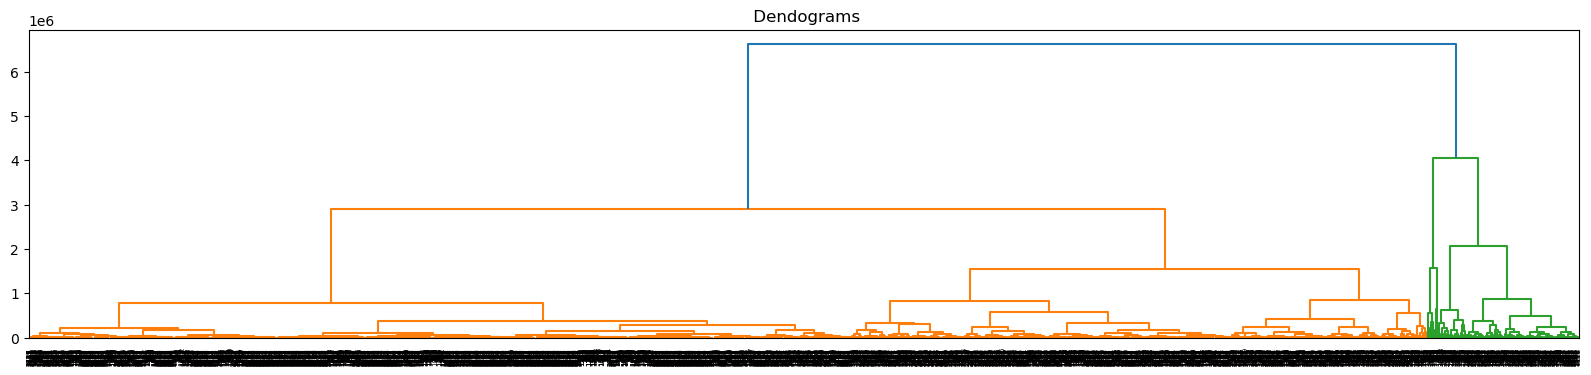

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 4))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward',metric='euclidean')) #ward = minimum of variance

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward') # ward = minimum

In [14]:
data['Group']=cluster.fit_predict(data)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Group
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


<AxesSubplot:xlabel='Bonus_miles', ylabel='Bonus_trans'>

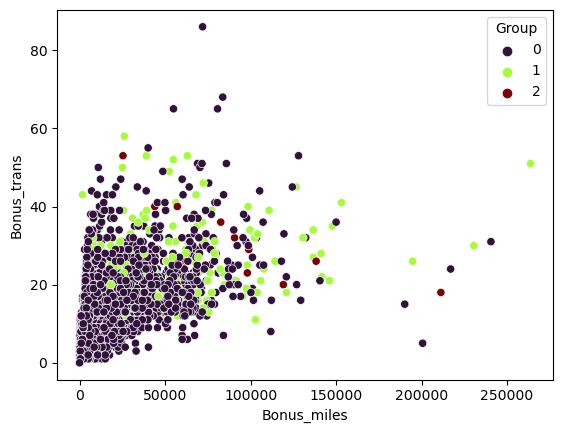

In [15]:
import seaborn as sns 
sns.scatterplot(customer_data['Bonus_miles'],data['Bonus_trans'],
                hue='Group',
                data=data,
                palette="turbo")

In [16]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Group
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
np.sum(data.Group.value_counts(ascending=False).values.tolist())

3999

# Business Submission

In [19]:
Final_Output = data.loc[:,["ID","Group"]]
Final_Output

,ID,Group
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
3994,4017,0
3995,4018,0
3996,4019,0
3997,4020,0


In [21]:
import os
os.chdir(r"C:\Users\Dell\Desktop\Machine Learning\unsupervied\cluster")

In [23]:
Final_Output.to_csv("east_west_airlines.csv",index=False)